In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
#Loading the data
data = pd.read_csv('crime_data.csv')

In [3]:
#Checking the shape of the data
data.shape

(50, 5)

In [4]:
#Checking null values
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
#Viewing some data
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


The data have three variables age, annual income and spending score.

In [6]:
#Creating X data with variables Annual Income and Spending Scores
X = data.iloc[:,1:].values
X

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

Here We have created a X data set which have annual income and spending score variables only. 

In [7]:
#Feature Scaling of the X Data
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

We have to compute optimal number of radius for performing DBSCAN and hence We will find nearst neighbor.

In [8]:
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(X) #Applying nearest neighbors on X data
distances, indices = nbrs.kneighbors(X) #Extracting euclidean distance and index numbers

We have performed nearest neighbors with taking 3 neighbor points to be covered while computing distance. We are getting euclidean distance with respect to nearest neighbors from the core points. 

In [9]:
#Checking distance (1st Nearest Distance and 2nd Nearest Distance)
distances

array([[0.        , 0.78006247, 0.84928467],
       [0.        , 2.07898369, 2.13697134],
       [0.        , 1.0482199 , 1.08341076],
       [0.        , 1.0013278 , 1.00722663],
       [0.        , 1.20897691, 1.30069114],
       [0.        , 1.24886253, 1.30069114],
       [0.        , 0.88100359, 0.95643249],
       [0.        , 1.19227586, 1.27140067],
       [0.        , 1.30974334, 1.34926273],
       [0.        , 0.86797806, 1.02250187],
       [0.        , 1.08184506, 1.16110091],
       [0.        , 0.75913104, 0.81522244],
       [0.        , 0.35377437, 0.83250223],
       [0.        , 0.43312429, 0.53571007],
       [0.        , 0.2079438 , 0.63822131],
       [0.        , 0.43312429, 0.52515083],
       [0.        , 0.8610239 , 1.07057017],
       [0.        , 0.78006247, 0.86797806],
       [0.        , 0.50466926, 0.65227142],
       [0.        , 0.54082482, 1.09106451],
       [0.        , 0.80586349, 0.91073424],
       [0.        , 0.58411812, 1.09106451],
       [0.

What it indicates ?
1. 0.00 is a euclidean distance from core point to core point which is a zero 
2. 0.08564307 is a euclidean distance from core point to 1st nearest distance point
   SQRT((X0 - X4)^2 + (Y0 - Y4)^2)
3. 0.27669913 is a euclidean distance from core point to 2nd nearest distance point
   SQRT((X0 - X16)^2 + (Y0 - Y16)^2)
4. So this is a distance point list from core point to core point, core point to 1st nearest point &      core point to 2nd nearest point.


In [10]:
#Checking Index
indices

array([[ 0, 17, 41],
       [ 1, 30, 21],
       [ 2, 30, 31],
       [ 3, 49, 45],
       [ 4, 27,  5],
       [ 5, 21,  4],
       [ 6, 37, 20],
       [ 7, 35, 49],
       [ 8, 30, 21],
       [ 9, 17, 41],
       [10, 43, 34],
       [11, 26, 40],
       [12, 31, 42],
       [13, 15, 35],
       [14, 28, 48],
       [15, 13, 35],
       [16, 25,  3],
       [17,  0,  9],
       [18, 28, 14],
       [19, 30, 21],
       [20, 29, 43],
       [21, 30, 19],
       [22, 48, 26],
       [23, 39, 32],
       [24, 45, 36],
       [25, 26, 49],
       [26, 15, 22],
       [27,  4, 21],
       [28, 14, 18],
       [29, 20, 34],
       [30, 19, 21],
       [31, 12, 42],
       [32, 39, 23],
       [33, 18, 28],
       [34, 35, 13],
       [35, 15, 13],
       [36, 46, 24],
       [37, 15, 34],
       [38, 20,  6],
       [39, 23,  0],
       [40, 47, 18],
       [41,  0,  9],
       [42, 12, 31],
       [43, 46, 20],
       [44, 33, 47],
       [45, 35, 13],
       [46, 36, 43],
       [47, 4

This is a index numbers list with repect to the distances which We have calculated above.

In [11]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec

[2.136971344643597,
 1.3492627276449263,
 1.300691141549338,
 1.300691141549338,
 1.2737434843867874,
 1.2714006712452572,
 1.1946964016190045,
 1.1946964016190045,
 1.1611009144493558,
 1.1212514637907172,
 1.091064514746985,
 1.091064514746985,
 1.0865316609298954,
 1.0834107590553272,
 1.0705701702968808,
 1.0485942788183757,
 1.0485942788183757,
 1.0225018692038894,
 1.0225018692038894,
 1.0075434347882106,
 1.0075434347882106,
 1.0072266290663898,
 0.9564324916279576,
 0.9325621570829024,
 0.9250945050118186,
 0.9107342425159917,
 0.9107342425159917,
 0.8679780563698087,
 0.8543564542245922,
 0.8543564542245922,
 0.849284665487476,
 0.8325022270723199,
 0.8232815438483984,
 0.8152224355390763,
 0.7892312284255611,
 0.7860298248284557,
 0.7441253749799489,
 0.7047147287128988,
 0.7011132598462632,
 0.6522714208221354,
 0.6382213052451658,
 0.6382213052451658,
 0.6189453256417937,
 0.6145176824765823,
 0.6145176824765823,
 0.5841181249165429,
 0.5357100654046991,
 0.5357100654046991

We choose 2nd nearest neighbor distance in descending order through which we can determine the radius though ploting.

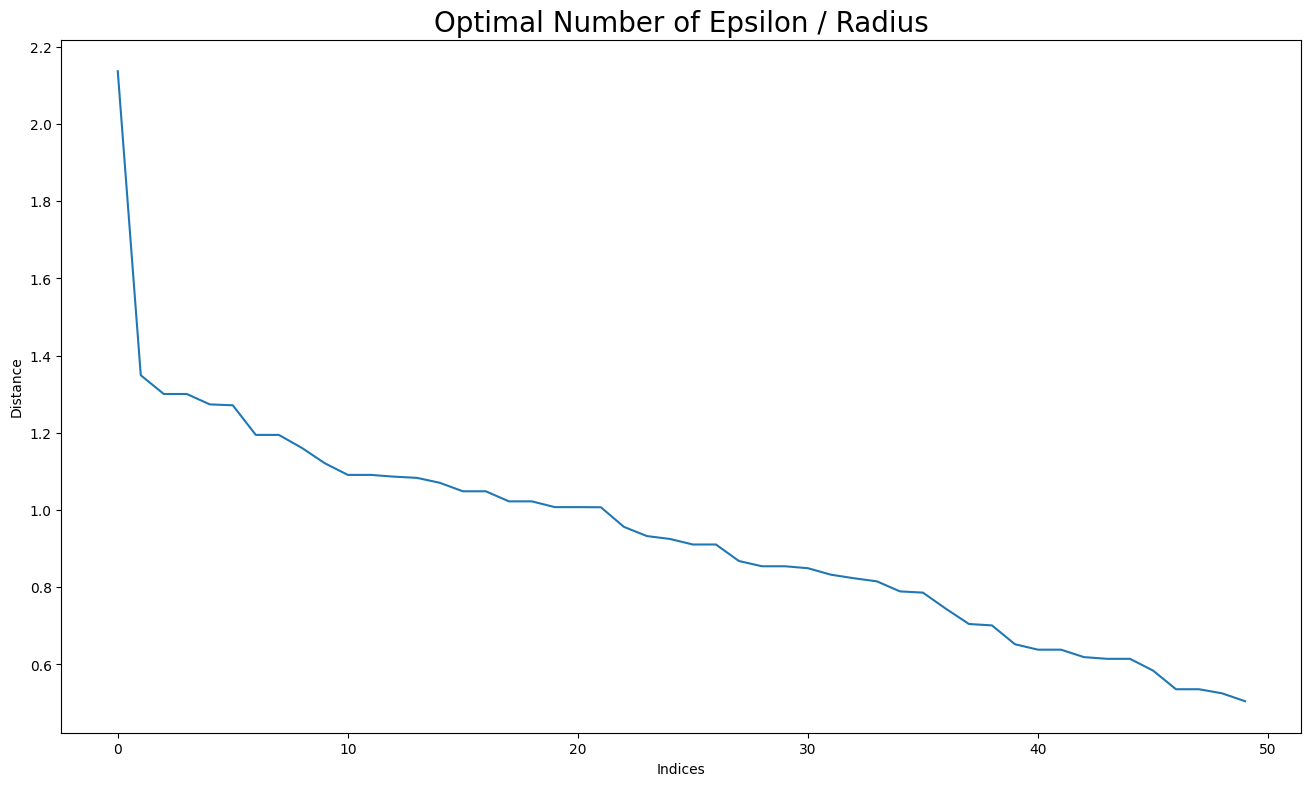

In [12]:
#Ploting 2nd nearest distance with index
plt.figure(figsize = (16,9))
plt.plot(indices[:,0],distanceDec);
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.title('Optimal Number of Epsilon / Radius', fontsize = 20)
plt.show()

As per graph, It indicates that 0.64 is the optimal point. 

In [13]:
#Implementing DBSCAN
db = DBSCAN(eps = 0.6, min_samples=3).fit(X)

In [14]:
#Checking the cluster labels generated from DBSCAN
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1,  2, -1,  2, -1, -1, -1, -1,  0, -1,  1, -1,  2, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [15]:
#Creating zeros arrays in boolean equivalent to core points of the labels
core_samples_mask = np.zeros_like(db.labels_, 
                                  dtype = bool) 
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [16]:
#Getting the index number of the core points 
db.core_sample_indices_

array([13, 15, 28, 30, 35], dtype=int64)

#Working for visualization

In [17]:
#Marking core points as True in core_samples_mask
core_samples_mask[db.core_sample_indices_] = True

In [18]:
#Creating labels variables
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1,  2, -1,  2, -1, -1, -1, -1,  0, -1,  1, -1,  2, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [19]:
#Computing number of clusters formed in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [20]:
#Counting how many -1 or outliers in the labels
n_noise_ = list(labels).count(-1)
n_noise_

38

In [21]:
#Printing estimated number of cluster and noise
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)  

Estimated number of clusters: 3
Estimated number of noise points: 38


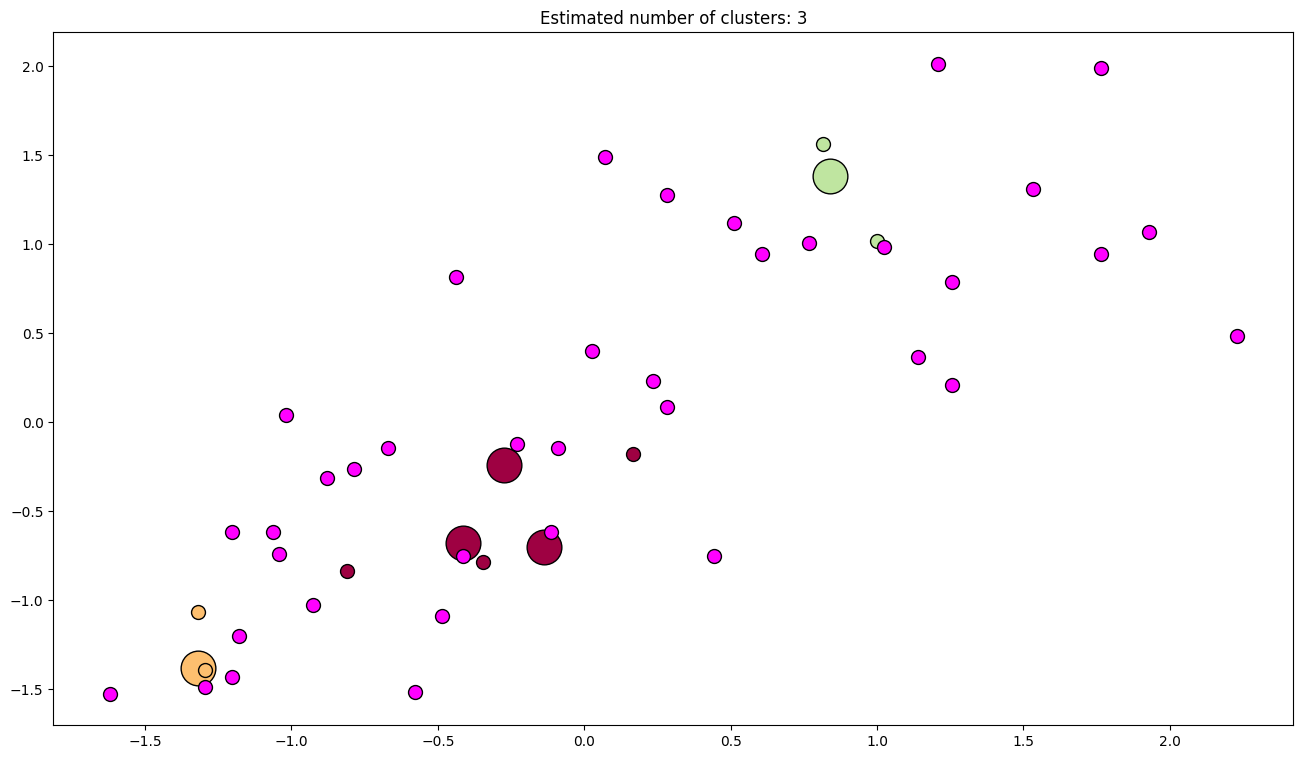

In [22]:
#Visualization of Clusters

plt.figure(figsize = (16,9)) #Fixing the size of the plot

unique_labels = set(labels) #Getting clusters labels {-1, 0, 1, 2, 3, 4, 5, 6}

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] #Creating 8 spectral numerical codes for colors from CMYK - cyan, magenta, yellow, and key

for k, col in zip(unique_labels, colors):
  if k == -1:
    col = [1, 0, 1, 1] #This is a CMYK numerical list number of pink color.
  
  class_member_mask = (labels == k) #It is stating that mark as True for -1 and rest of are False in labels

  xy = X[class_member_mask & core_samples_mask] #class_member_mask is a outlier data points & core_samples_mask is a core points
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=25)

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=10)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

As per the visualization from the above graph, We can easy observe the outliers and formed a clusters.